Maximum A Posteriori (MAP) Estimation at Casino Evil 
----

<br>
<center><img src="images/evil.png" width="400"/></center>

You and your pair have decided to go to Nevada after graduation but are too poor to go to Las Vegas. You ended up in Fallon, NV at __Casino Evil__😈.

The first game you play is a coin flipping game. But you think Casino Evil might be using unfair coins.

We are going to create MAP estimates to model that Bernoulli distribution. 

For MAP we need some kind of prior, the beta distribution is the conjugate prior probability distribution for the Bernoulli distribution.

For example, the beta distribution can be used in Bayesian analysis to describe initial prior knowledge concerning probability of success (e.g., bias of a coin towards heads).

In [1]:
reset -fs

SymPy
-----

SymPy is a Python library for symbolic mathematics. It will help us with the symbolic calculus.

__TODO__: Install sympy

$ pip install sympy

--------

In [110]:
import sympy
from sympy import stats as st
from sympy.abc import p,k,n,x

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from sympy import plot

%matplotlib inline

I have written the objective function for you.

__TODO__: Please comment each line

In [75]:
α = 6
β = 6
objective = sympy.expand_log(sympy.log(p**k*(1-p)**(n-k)* 
                             st.density(st.Beta('p', α, β))(p)))

__TODO__: Plot the Beta Distrubtion prior

In [50]:
b = beta(α ,β)

In [51]:
b.pdf(.5)

2.7070312500000004

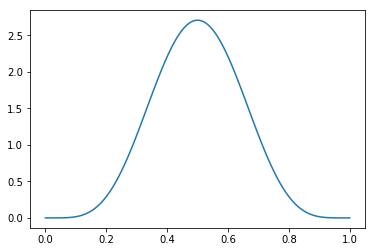

In [52]:
plt.plot(np.linspace(0,1,100),[beta(α ,β).pdf(i) for i in np.linspace(0,1,100)])

__TODO__: What does this prior suggest about our beliefs?

- This suggests that we think that the true parameter for P( fair coin) is normally distributed around .5

Let's use calculus to maximize objective

In [41]:
max_objective = sympy.solve(sympy.simplify(sympy.diff(objective,p)),p)[0]
print(max_objective)

(k + 5)/(n + 10)


__TODO__: What is k and n?

In [94]:
# k is the number of heads
# n is the number of trials

__TODO__: Write the MAP estimator for θ

- The MAP estimator is  (5+n*$\theta$)/(10+n)

In [89]:
theta

(k + 5)/(n + 10)

- the MAP estimator is (n*$\theta$+5)/(n+10)

__TODO__: Is this a biased estimator of θ? Does that result make intuitive sense?

<br>
<details><summary>
Click here for a hint…
</summary>
What is the expected value of θ?
</details>

- Bias is the difference between the expected value of $\theta_{hat}$ - $\theta_{true}$ which should = 0
- This means does  (n*$\theta_{true}$+5)/(n+10) - $\theta_{true}$ = 0 ?
- No! here $\theta_{true}$ = .5
- This IS a biased estimated of $\theta$

In [113]:
beta(α,β).expect()

0.5

__TODO__: Calculate the maximum likelihood (ML) estimator for θ:

$Binomial = \textstyle {n \choose k}\,p^{k}(1-p)^{n-k}$

- the MLE estimator is k/n where k is the number of successes and n is the total number of trials

__TODO__: How does the MAP and MLE θs compare?

- The MAP is a biased estimator due to the prior function 
- The MLE is an unbiased estimator because k/n = $\theta$*n/n - $\theta$ = 0. This is true, so this is NOT an biased estimator

__TODO__: Change the Beta distribution so MAP will return the same estimate as MLE:

In [98]:
# set alpha and beta = 1
# This is because the probability density is one everywhere 

In [103]:
α = 1
β = 1
uniform_objective = sympy.expand_log(sympy.log(p**k*(1-p)**(n-k)* 
                             st.density(st.Beta('p', α, β))(p)))

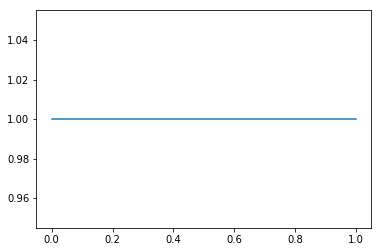

In [104]:
plt.plot(np.linspace(0,1,100),[beta(α ,β).pdf(i) for i in np.linspace(0,1,100)])

__TODO__: Plot this Beta Distrubtion prior

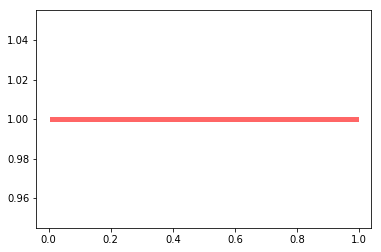

__TODO__: What does this prior suggest about our beliefs?

In [ ]:
# This prior suggests that we impose no outside information on where our parameter should be 
# i.e. all possible values of Theta are equally likely

__TODO__: Redo the caculus to to maximize the objective

In [101]:
# this is the MLE estimate of theta which = k/n

In [111]:
α = 1
β = 1
uniform_objective = sympy.expand_log(sympy.log(p**k*(1-p)**(n-k)* 
                             st.density(st.Beta('p', α, β))(p)))


In [112]:
sympy.solve(sympy.simplify(sympy.diff(uniform_objective,p)),p)[0]

k/n

__TOD0__ For which Θ does MLE equal MAP?

In [115]:
#(n* θ +5)/(n+10) = MAP
# k/n = MLE
# Assume n =10, and  θ =.5
# Then, MAP = (5+5)/(10+10) = .5, and the MLE = .5*10/10 = .5
#  therefore, the MAP = MLE when  θ = .5

# In addition, if you consider theta to be a distribution, over possible theta values, 
# then theta equals the uniform distribution. 

---
Future Directions
-----

We can use the previous posterior distribution as the prior for the next posterior distribution,

> “Today's posterior is tomorrow's prior”   
> — Lindley

$$
\mathbb{P}(\theta|x_{k+1}) = \frac{\mathbb{P}(x_{k+1}|\theta)\mathbb{P}(\theta|x_k)}{\mathbb{P}(x_{k+1})}
$$

We can us every data sample $x_k$ as a parameter for the posterior distribution instead of lumping all the samples together in a summation (this is where we got the $k$ term in the prior case). 

This case is much harder to analyze because now every incremental posterior distribution is itself a random function because of the injection of the $x$ random variable. 

On the other hand, this is more in line with more general Bayesian methods because it is clear that the output of this estimation process is a posterior distribution function, not just a single parameter estimate. 

-----
Challenge Exercises
------

__TODO__: Calculte the variance of MAP estimate

In [ ]:
 # https://github.com/unpingco/Python-for-Signal-Processing/blob/master/MAP_Estimation.ipynb

In [119]:
def map_variance(n,p):
    return (n*(1-p)*p)/(n+10)**2

In [126]:
map_variance(10,.5)

0.00625


__TODO__: Calculte the variance of MLE estimate

In [122]:
def variance_mle(n,p):
    return (p*(1-p))/n

In [123]:
variance_mle(10,.5)

0.025

__TODO__: Find the ratio of two variances

In [124]:
map_variance(10,.5)/variance_mle(10,.5)

0.25

__TODO__: What does the ratio tell use about two estimators?

In [127]:
# this tells us that the variance of MLE is 4x greater than the variance of the MAP

__TODO__: What can infer based on the ratio of two variances?

<br>
----